<a href="https://colab.research.google.com/github/emagnu/github-slideshow/blob/emagnu-patch-1/course_project_instacart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('course-project-instacart')
jovian.set_colab_id('1wektnfVtY2Z2Sbu9ZGUtRQUEJ_PllvsD')

# course-project-instacart

Use the "Run" button to execute the code.

In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
import jovian

In [2]:
# Execute this to save new versions of the notebook
jovian.commit(project="course-project-instacart")

In [ ]:
print('emmanuele')

emmanuele


#### **Install the libraries**

In [ ]:
!pip install numpy pandas matplotlib seaborn --quiet

In [ ]:
!pip install jovian opendatasets xgboost graphviz lightgbm scikit-learn xgboost lightgbm --upgrade --quiet

     |████████████████████████████████| 166.7 MB 17 kB/s 
     |████████████████████████████████| 2.0 MB 46.5 MB/s 
     |████████████████████████████████| 22.3 MB 1.4 MB/s 


### **Problem statement**


> In this competition, Instacart is challenging the Kaggle community to use this anonymized data on customer orders over time to predict which previously purchased products will be in a user’s next order. They’re not only looking for the best model, Instacart’s also looking for machine learning engineers to grow their team.

### **Import the Libraries, set the options**

In [ ]:
import os
import opendatasets as od
import pandas as pd
pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})

In [ ]:
od.download('https://www.kaggle.com/c/instacart-market-basket-analysis/')

Skipping, found downloaded files in "./instacart-market-basket-analysis" (use force=True to force download)


In [ ]:
os.listdir('instacart-market-basket-analysis')
#os.listdir('/content/instacart-market-basket-analysis')

['order_products__prior.csv.zip',
 'products.csv.zip',
 'sample_submission.csv.zip',
 'aisles.csv.zip',
 'departments.csv.zip',
 'orders.csv.zip',
 'order_products__train.csv.zip']

#### **Unzip and save the csv files**

In [ ]:
!unzip '/content/instacart-market-basket-analysis/*.zip' -d '/content/instacart-market-basket-analysis-unzip/'

Archive:  /content/instacart-market-basket-analysis/order_products__prior.csv.zip
replace /content/instacart-market-basket-analysis-unzip/order_products__prior.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/instacart-market-basket-analysis-unzip/order_products__prior.csv  Y

  inflating: /content/instacart-market-basket-analysis-unzip/__MACOSX/._order_products__prior.csv  

Archive:  /content/instacart-market-basket-analysis/products.csv.zip
  inflating: /content/instacart-market-basket-analysis-unzip/products.csv  
  inflating: /content/instacart-market-basket-analysis-unzip/__MACOSX/._products.csv  

Archive:  /content/instacart-market-basket-analysis/sample_submission.csv.zip
  inflating: /content/instacart-market-basket-analysis-unzip/sample_submission.csv  

Archive:  /content/instacart-market-basket-analysis/aisles.csv.zip
  inflating: /content/instacart-market-basket-analysis-unzip/aisles.csv  
  inflating: /content/instacart-market-basket-analysis-unzip/__MA

In [ ]:
os.listdir('instacart-market-basket-analysis-unzip')

['products.csv',
 'departments.csv',
 'order_products__train.csv',
 'sample_submission.csv',
 '__MACOSX',
 'order_products__prior.csv',
 'orders.csv',
 'aisles.csv']

In [ ]:
aisles_df = pd.read_csv('/content/instacart-market-basket-analysis-unzip/aisles.csv', low_memory=False)
departments_df = pd.read_csv('/content/instacart-market-basket-analysis-unzip/departments.csv', low_memory=False)
order_products__prior_df = pd.read_csv('/content/instacart-market-basket-analysis-unzip/order_products__prior.csv', low_memory=False)
order_products__train_df = pd.read_csv('/content/instacart-market-basket-analysis-unzip/order_products__train.csv', low_memory=False)
orders_df = pd.read_csv('/content/instacart-market-basket-analysis-unzip/orders.csv', low_memory=False)
products_df = pd.read_csv('/content/instacart-market-basket-analysis-unzip/products.csv', low_memory=False)
#submission_df = pd.read_csv('./instacart-market-basket-analysis-unzip/sample_submission.csv')

## Other code supervised (to delete)


> [Instacart-Exploratory-Data-Analysis (Fred Navruzov)](https://www.kaggle.com/frednavruzov/instacart-exploratory-data-analysis). + [Links between the files](https://www.kaggle.com/c/instacart-market-basket-analysis/discussion/33128#183176)    
> [Exploratory Analysis - Instacart (Philipp Spachtholz)](https://www.kaggle.com/philippsp/exploratory-analysis-instacart?scriptVersionId=1295774)     
> bbb 



## **Data Exploration and Visualisation**

### **Data Organisation and Manipulation**

#### **Product DataFrame**

The Dataframes products_df, aisles_df & departments_df are combined (left joined) for speed, semplicity and clarity of analysis.

Current dataframes:
* `aisles_df` = (134, 2)
* `departments_df` = (21, 2)
* order_products__prior_df = (32434489, 4)
* order_products__train_df = (1384617, 4)
* orders_df = (3421083, 7)
* orders_df = (3421083, 7)
* `products_df` = (49688, 4)



In [ ]:
product = pd.merge(left=pd.merge(left=products_df, right=departments_df, how='left'), right=aisles_df, how='left')


In [ ]:
# Format (lower letter) and attach all products' names with '_' to make them easily retrievable
prod_df['product_name'] = prod_df['product_name'].str.replace(' ', '_').str.lower() 


#### **Data Analysis**

In [7]:
print("Dataframe's Shape")
print(f'* aisles_df = {aisles_df.shape}')
print(f'* departments_df = {departments_df.shape}')
print(f'* order_products__prior_df = {order_products__prior_df.shape}')
print(f'* order_products__train_df = {order_products__train_df.shape}')
print(f'* orders_df = {orders_df.shape}')
print(f'* products_df = {products_df.shape}')
#print(f'* submission_df = {submission_df.shape}')

Dataframe's Shape


NameError: ignored

In [ ]:
aisles_df
## Instacart virtual supermarket is made up of 134 different isles

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [ ]:
# There are no null values in the 'aisles' Set
aisles_df.isnull().sum().sort_values(ascending=False)

aisle       0
aisle_id    0
dtype: int64

In [ ]:
aisles_df.info()

In [ ]:
departments_df
## ## Instacart virtual supermarket is made up of 21 different depratments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [ ]:
# There are no null values in the 'departments' Set
departments_df.isnull().sum().sort_values(ascending=False)

department       0
department_id    0
dtype: int64

In [ ]:
order_products__prior_df

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


In [ ]:
# There are no null values in the 'Prior Order' Set
order_products__prior_df.isnull().sum().sort_values(ascending=False)

reordered            0
add_to_cart_order    0
product_id           0
order_id             0
dtype: int64

In [ ]:
order_products__train_df

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


In [ ]:
# There are no null valuse in the 'Training' Set
order_products__train_df.isnull().sum().sort_values(ascending=False)

reordered            0
add_to_cart_order    0
product_id           0
order_id             0
dtype: int64

In [ ]:
orders_df   #.sample(20)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [ ]:
# There are 206209 NaN values in days_since_prior_order. There are no other null values in the 'Product Order' Set
orders_df.isnull().sum().sort_values(ascending=False)

days_since_prior_order    206209
order_hour_of_day              0
order_dow                      0
order_number                   0
eval_set                       0
user_id                        0
order_id                       0
dtype: int64

In [ ]:
products_df
## Instacart carries 49688 different products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [ ]:
# There are no null values in the 'Products' Set
products_df.isnull().sum().sort_values(ascending=False)

department_id    0
aisle_id         0
product_name     0
product_id       0
dtype: int64

In [ ]:
submission_df

,order_id,products
0,17,39276 29259
1,34,39276 29259
2,137,39276 29259
3,182,39276 29259
4,257,39276 29259
...,...,...
74995,3420740,39276 29259
74996,3420877,39276 29259
74997,3420888,39276 29259
74998,3420989,39276 29259


he Dataset is an anonymized sample of over 3,000,000 grocery orders from more than 200,000 Instacart users.
The data provided is pretty complete. All DataFrames contain meaningful values. Only `days_since_prior_order` displays 206,209 null (`NaN`) values. It is reasonable to assume that customers (`user_id`) associated with these orders were firt time buyers.

### **Order time and reorders**
Of some interest is the time and the day at which customers tend to submit their orders.

.
#### **Popular hours**
There is a clear correlation between order volume and hour of day. It seems that most of the order are cncentrated between 9.00-18.00

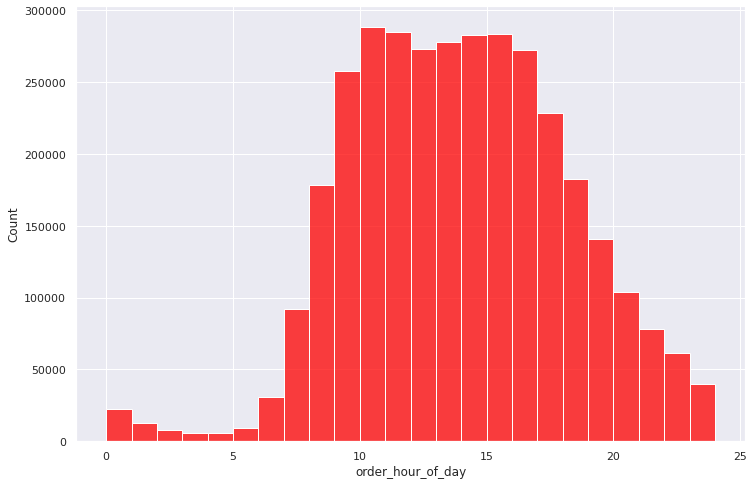

In [ ]:
sns.histplot(x='order_hour_of_day', data=orders_df, bins=24, binrange=(0, 24), color='red', legend=True);
#sns.histplot(x='order_hour_of_day', data=orders_df, bins=24, binrange=(0, 24), hue='order_dow', multiple='stack');

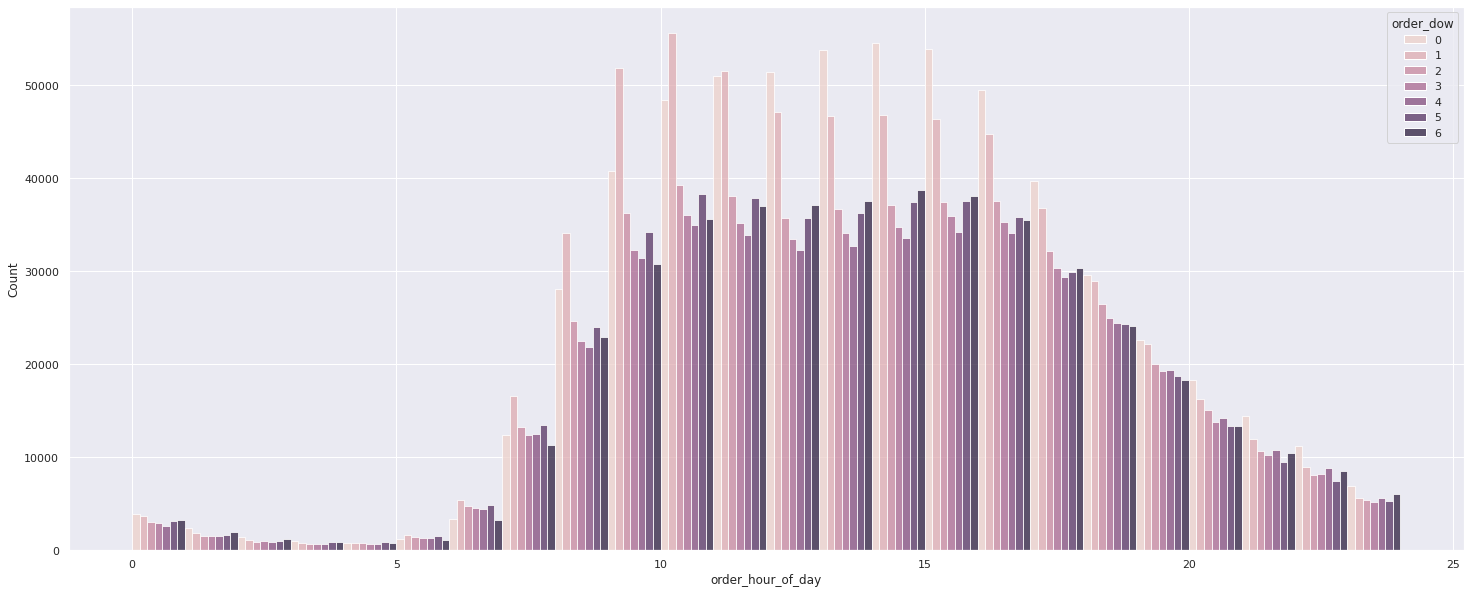

In [ ]:
sns.set(rc={'figure.figsize':(25,10)})
sns.histplot(x='order_hour_of_day', data=orders_df, bins=24, binrange=(0, 24), hue='order_dow', multiple="dodge");
sns.set(rc={'figure.figsize':(12,8)})

#### **Popular days**
The exact day is not give but it is logical to assume that the two most popular consective days for shopping are Saturday and Sunday, while every other day of the week has about the same 

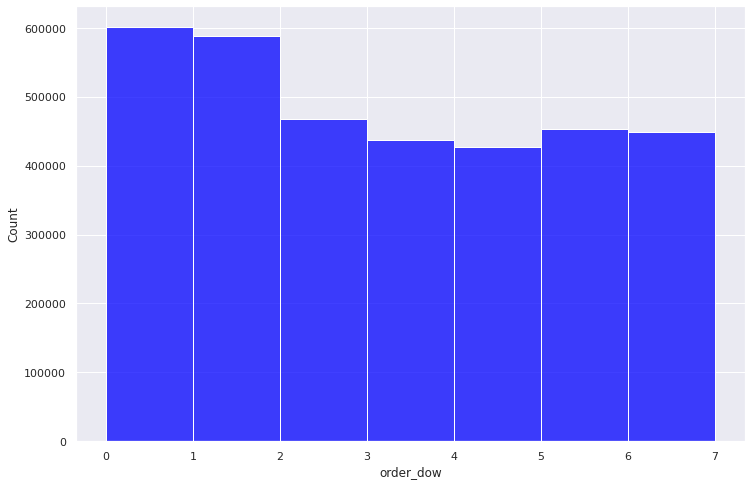

In [ ]:
sns.histplot(x='order_dow', data=orders_df, bins=7, binrange=(0,7), color='blue', legend=True);    #['Monday',	'Tuesday',	'Wednesday', 'Thursday', 'Friday',	'Saturday', 'Sunday']);

In [ ]:
#[Monday,	Tuesday,	Wednesday, Thursday, Friday,	Saturday, Sunday]

#### **Reorders**
The following graph shows the frequency of the orders. It is clear that people tend to redorder every weeke and at the end of the month 

In [5]:
sns.histplot(x='days_since_prior_order', data=orders_df, bins=31, binrange=(0, 30),color='green'); #, hue='order_dow')  #, stat='probability');   #, kde=True);

In [6]:
sns.histplot(x='reordered', data=order_products__prior_df); 

In [ ]:
cnt_srs = orders_df.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
cnt_srs = cnt_srs.order_number.value_counts()